## NN Linear regression
- 연비 데이터

In [ ]:
# !pip install ipython-autotime

time: 462 µs (started: 2024-06-28 05:29:21 +00:00)


In [1]:
%load_ext autotime

time: 98.5 µs (started: 2024-07-08 13:07:22 +09:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

2024-07-08 13:07:28.393529: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/dusanbaek/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


time: 8.46 s (started: 2024-07-08 13:07:24 +09:00)


## 1. 데이터 준비

In [3]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv

--2024-07-08 13:07:39--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 18131 (18K) [text/plain]
저장 위치: `auto-mpg.csv'

auto-mpg.csv        100%[===================>]  17.71K  --.-KB/s    /  0.02s   

2024-07-08 13:07:39 (1.07 MB/s) - `auto-mpg.csv' 저장함 [18131/18131]

time: 1.4 s (started: 2024-07-08 13:07:38 +09:00)


In [4]:
auto = pd.read_csv('auto-mpg.csv')

time: 19.4 ms (started: 2024-07-08 13:07:58 +09:00)


In [5]:
auto.shape

(398, 9)

time: 5.68 ms (started: 2024-07-08 13:07:59 +09:00)


In [6]:
df = auto.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


time: 20.7 ms (started: 2024-07-08 13:08:01 +09:00)


In [7]:
df.info() # 마력에 문자열이 있는 상태 그래서 object라고 나옴

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
time: 75.1 ms (started: 2024-07-08 13:08:05 +09:00)


In [8]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


time: 11.3 ms (started: 2024-07-08 13:08:05 +09:00)


In [9]:
df.loc[df['horsepower'] == '?', 'horsepower'] = np.nan
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

time: 5.09 ms (started: 2024-07-08 13:08:06 +09:00)


In [10]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

time: 4.25 ms (started: 2024-07-08 13:08:07 +09:00)


In [11]:
df = df.dropna()

time: 3.12 ms (started: 2024-07-08 13:08:08 +09:00)


In [12]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

time: 4.25 ms (started: 2024-07-08 13:08:09 +09:00)


In [14]:
df['horsepower'] = df['horsepower'].astype(int)
df['horsepower'].unique()

df.drop(['origin', 'car_name'], axis=1, inplace=True) # 필요 없는 파라미터들은 제거해 줌.
df.head()

KeyError: "['origin', 'car_name'] not found in axis"

time: 2.11 s (started: 2024-07-08 13:08:30 +09:00)


### Train, Test split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
print(train.shape, test.shape)

(313, 7) (79, 7)
time: 4.07 ms (started: 2024-06-28 05:29:21 +00:00)


### 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

time: 516 µs (started: 2024-06-28 05:29:21 +00:00)


### X, y 분리

In [ ]:
X_train = train.drop('mpg', axis=1)
y_train = train['mpg']

X_test = test.drop('mpg', axis=1)
y_test = test['mpg']

time: 2.45 ms (started: 2024-06-28 05:29:21 +00:00)


In [ ]:
ss = StandardScaler() # 평균과 표준편차를 이용한 스케일링
X_train = ss.fit_transform(X_train)
X_train

array([[ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
         0.49452752],
       [-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
        -0.0572982 ],
       [ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
        -0.33321105],
       ...,
       [-0.87318372, -0.4297035 , -0.51263699, -0.1561399 ,  0.73076722,
         0.49452752],
       [-0.87318372, -0.94128319, -1.0358895 , -0.72175802,  1.83265289,
         1.32226608],
       [ 1.48290683,  1.97375578,  1.18793363,  2.39450014, -0.54884195,
        -0.88503677]])

time: 10 ms (started: 2024-06-28 05:29:21 +00:00)


In [ ]:
y_train = y_train.to_numpy()
y_train

array([18.6, 25. , 18. , 15. , 39. , 15.5, 29.8, 25. , 21.5, 17. , 16. ,
       22.3, 30.7, 30. , 31. , 19.2, 16.5, 18. , 13. , 27.5, 18. , 11. ,
       17. , 14. , 26. , 34.2, 34.4, 35.1, 20. , 22. , 18.2, 32. , 31.9,
       21. , 22. , 37.2, 32.9, 19.4, 15. , 22. , 21. , 37. , 21. , 15. ,
       31. , 23. , 24.5, 29. , 30.5, 15. , 34.7, 27. , 28. , 19. , 41.5,
       17.5, 29. , 26. , 31.8, 18. , 16.5, 13. , 19. , 30. , 20. , 19. ,
       27. , 23. , 14. , 20.6, 27.9, 15. , 32. , 12. , 23. , 33.5, 25.5,
       40.8, 16.5, 32.3, 44.3, 12. , 32.8, 24. , 18.1, 14. , 13. , 11. ,
       18. , 32. , 27.2, 16. , 17.5, 12. , 26. , 14. , 28. , 20. , 13. ,
       27.2, 29. , 19.1, 28. , 27. , 19. , 26. , 15.5, 13. , 38. , 18. ,
       23.7, 24.5, 34. , 23. , 26. , 33. , 29.5, 15. , 24. , 32. , 14. ,
       14. , 39.1, 17.5, 17. , 21. , 33. , 25.8, 20.3, 24. , 20.2, 23.9,
       34. , 20.2, 28.1, 13. , 39.4, 14. , 16. , 18.5, 20. , 32. , 18. ,
       26.5, 16. , 16. , 29. , 10. , 15. , 46.6, 20

time: 8.24 ms (started: 2024-06-28 05:29:21 +00:00)


In [ ]:
print(type(X_train), type(y_train))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 621 µs (started: 2024-06-28 05:29:22 +00:00)


In [ ]:
from keras import layers

# 신경망을 쌓을 때에는 input의 dimension과 output의 dimension이 중요함
model = keras.Sequential (
    [
      layers.Dense(units=5, activation= 'relu', input_shape=(X_train.shape[1],)),
      layers.Dense(units=3, activation= 'relu'),
      layers.Dense(units=1, activation= 'linear')
    ]
)

time: 55.8 ms (started: 2024-06-28 05:29:22 +00:00)


In [ ]:
model.summary() # 6개가 5개로 가고 5개 추가니까 6 x 5 + 5 = 35, 5개가 3개로 가니까 5 x 3 + 3 = 18

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 5)                 35        
                                                                 
 dense_8 (Dense)             (None, 3)                 18        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 21.3 ms (started: 2024-06-28 05:29:22 +00:00)


In [ ]:
model.compile(
    loss= 'mse',
    optimizer= 'adam',
    metrics= ['mse', 'mae']
)

time: 10.3 ms (started: 2024-06-28 05:29:22 +00:00)


### 학습

In [ ]:
epochs = 100
batch_size = 16

history = model.fit(
    X_train, y_train,
    epochs = epochs,
    batch_size = batch_size,
    validation_split=0.2
    )

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 610.3450 - mse: 610.3450 - mae: 23.3260 - val_loss: 692.8916 - val_mse: 692.8916 - val_mae: 25.0810
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 605.7783 - mse: 605.7783 - mae: 23.2323 - val_loss: 688.3271 - val_mse: 688.3271 - val_mae: 24.9962
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 601.1903 - mse: 601.1903 - mae: 23.1373 - val_loss: 684.0820 - val_mse: 684.0820 - val_mae: 24.9148
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 596.8429 - mse: 596.8429 - mae: 23.0451 - val_loss: 679.7732 - val_mse: 679.7732 - val_mae: 24.8305
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 592.5294 - mse: 592.5294 - mae: 22.9498 - val_loss: 675.4265 - val_mse: 675.4265 - val_mae: 24.7430
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 588.2626 - mse: 588.2626 - mae: 22.8525 - val_loss: 670.9667 

In [ ]:
hist = history.history
epochs = history.epoch

time: 581 µs (started: 2024-06-28 05:29:33 +00:00)


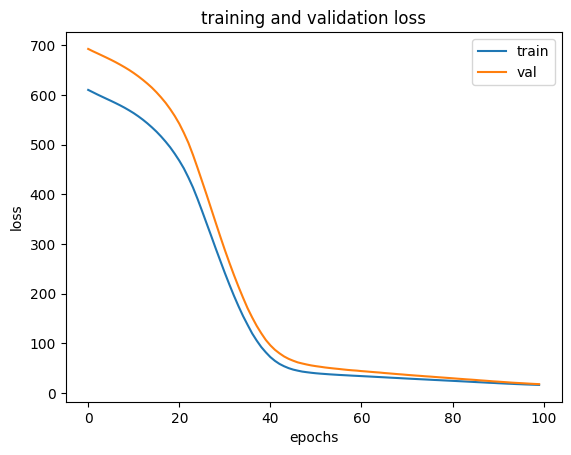

time: 254 ms (started: 2024-06-28 05:29:33 +00:00)


In [ ]:
plt.plot(epochs, hist['loss'], label= 'train')
plt.plot(epochs, hist['val_loss'], label= 'val')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# 훈련할 수록 훈련 데이터와 검증 데이터의 loss값이 줄어들어야 함. 둘이 같은 기조를 보이지 않는다면 과적합이 걸리는 것으로 해석 가능.

## 3. 평가

In [ ]:
X_test = ss.transform(X_test)
y_test = y_test.to_numpy()

time: 5.01 ms (started: 2024-06-28 05:29:33 +00:00)


In [ ]:
print(type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 2.17 ms (started: 2024-06-28 05:29:33 +00:00)


In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step
time: 128 ms (started: 2024-06-28 05:29:33 +00:00)


In [ ]:
y_pred

array([[25.179707],
       [20.550102],
       [36.44219 ],
       [25.763885],
       [29.557182],
       [29.133013],
       [17.33357 ],
       [29.538025],
       [14.369212],
       [32.108505],
       [12.767102],
       [16.591494],
       [17.301521],
       [28.066437],
       [12.09482 ],
       [34.07285 ],
       [14.425444],
       [33.86862 ],
       [27.061932],
       [28.628216],
       [11.234143],
       [44.49216 ],
       [37.528915],
       [13.976064],
       [30.482025],
       [23.05234 ],
       [17.243788],
       [11.384872],
       [31.872585],
       [20.714321],
       [17.335894],
       [19.494873],
       [18.886974],
       [32.625797],
       [17.395645],
       [38.855473],
       [17.820839],
       [24.283566],
       [17.301416],
       [15.916926],
       [16.167036],
       [27.845552],
       [37.787014],
       [25.938982],
       [17.332882],
       [16.299978],
       [11.630412],
       [33.954838],
       [23.87135 ],
       [32.383873],


time: 5.87 ms (started: 2024-06-28 05:29:33 +00:00)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse, mae)

14.858364841362388 3.1571408887452717
time: 1.94 ms (started: 2024-06-28 05:29:33 +00:00)


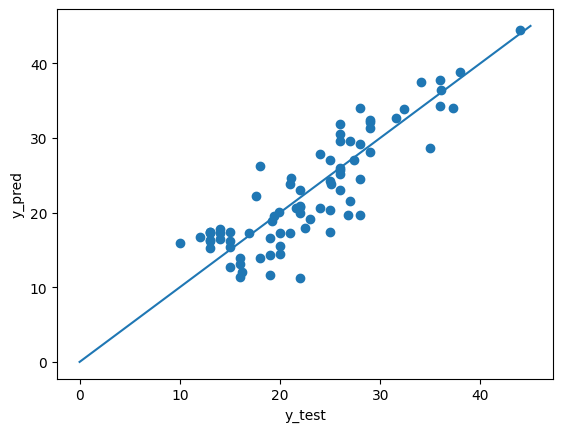

time: 383 ms (started: 2024-06-28 05:30:01 +00:00)


In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([0, 45], [0, 45])
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()